In [1]:
# Import some pacakges
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request 

#Thanks Ethan!
import os
data_file = "airfol.csv"
if not os.path.exists(data_file):
    urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", data_file)
urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat", "airfoil.csv")

# This code imports a data set from a .csv file (in the same directory as this notebook) and stores it in a DataFrame.
df_mydata = pd.read_csv('airfoil.csv',header=None, delimiter="\t")

# Specifying the column names
headers =  ["Frequency (Hz)","Angle of attack (Degrees)","Chord length (m)","Free-stream velocity (m/s)","Suction side displacement thickness (m)", "Scaled sound pressure level (decibels)"]
df_mydata.columns = headers

#  First few entries of the data set.
df_mydata.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [2]:
# Speficy a DataFrame by selecting columns of a certain type.
df_mydata_numerical = df_mydata.select_dtypes(include='float64')
df_mydata_categorical = df_mydata.select_dtypes(include='object')
# We normalize the data using min-max normalization.
from sklearn import preprocessing
x = df_mydata.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_mydata_norm = pd.DataFrame(x_scaled)
headers2 =  ["Frequency (Hz)","Angle of attack (Degrees)","Chord length (m)","Free-stream velocity (m/s)","Suction side displacement thickness (m)", "Scaled sound pressure level (decibels)"]
df_mydata_norm.columns = headers2
df_mydata_norm.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels)
0,0.030303,0.0,1.0,1.0,0.039005,0.606829
1,0.040404,0.0,1.0,1.0,0.039005,0.580238
2,0.053030,0.0,1.0,1.0,0.039005,0.600181
3,0.070707,0.0,1.0,1.0,0.039005,0.643790
4,0.090909,0.0,1.0,1.0,0.039005,0.640333


In [3]:
airfol_column_order_std = df_mydata_norm.std().sort_values(ascending=False).index
df_mydata_norm_std = df_mydata_norm[airfol_column_order_std]
df_mydata_norm_std.head()

,Free-stream velocity (m/s),Chord length (m),Angle of attack (Degrees),Suction side displacement thickness (m),Scaled sound pressure level (decibels),Frequency (Hz)
0,1.0,1.0,0.0,0.039005,0.606829,0.030303
1,1.0,1.0,0.0,0.039005,0.580238,0.040404
2,1.0,1.0,0.0,0.039005,0.600181,0.053030
3,1.0,1.0,0.0,0.039005,0.643790,0.070707
4,1.0,1.0,0.0,0.039005,0.640333,0.090909


In [4]:
df_mydata_norm_std_subset = df_mydata_norm_std.iloc[:, 4:6:1].copy()
df_mydata_norm_std_subset.head()

,Scaled sound pressure level (decibels),Frequency (Hz)
0,0.606829,0.030303
1,0.580238,0.040404
2,0.600181,0.053030
3,0.643790,0.070707
4,0.640333,0.090909


In [5]:
df_mydata_norm_std_subset.shape

(1503, 2)

In [6]:
from sklearn.cluster import KMeans


# Specify the value of K, initialization method, and number of times KMeans is run.
km = KMeans(3, init = 'random', n_init = 10)

# Fit the model to your data set (in other words, apply km to your data.
km.fit(df_mydata_norm_std_subset)

# This extracts the coordinates corresponding to the clusters' centers.
centers = km.cluster_centers_
# This extracts the cluster labels.
label = km.labels_

In [7]:
x = km.fit_predict(df_mydata_norm_std_subset)
x

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [8]:
df_mydata_norm_std_subset["Cluster"]= x
df_mydata_norm_std_subset.head()

,Scaled sound pressure level (decibels),Frequency (Hz),Cluster
0,0.606829,0.030303,0
1,0.580238,0.040404,0
2,0.600181,0.053030,0
3,0.643790,0.070707,0
4,0.640333,0.090909,0


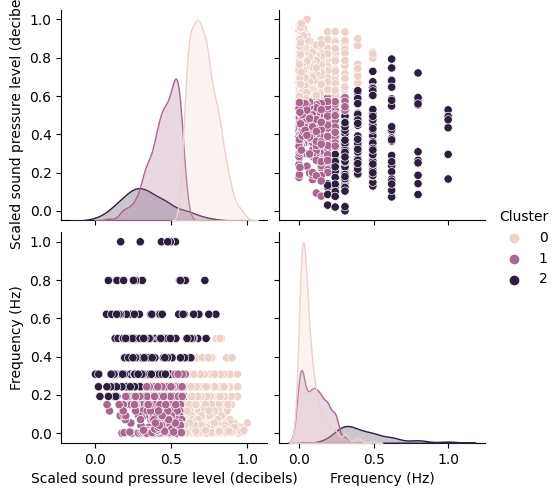

In [9]:
# Add column to df_mydataNumerical containing cluster labels.
# use these cluster labels to color the data points
sns.pairplot(df_mydata_norm_std_subset, hue='Cluster');

In [10]:
Data_copy = df_mydata_norm_std_subset.copy()

In [11]:
Data_copy = Data_copy[Data_copy.Cluster == 2]

In [12]:
Data_copy.head()

,Scaled sound pressure level (decibels),Frequency (Hz),Cluster
9,0.429734,0.308081,2
10,0.366182,0.393939,2
11,0.319382,0.494949,2
12,0.235621,0.621212,2
13,0.142021,0.797980,2


In [13]:
Data_copy.shape

(211, 3)

In [14]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

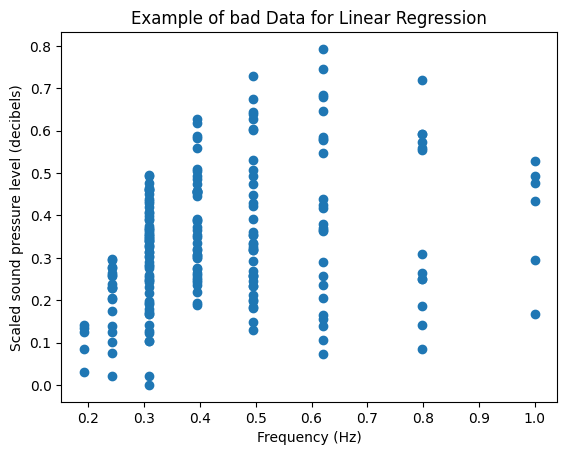

In [15]:
plt.scatter(Data_copy['Frequency (Hz)'],Data_copy['Scaled sound pressure level (decibels)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Example of bad Data for Linear Regression');

In [16]:

X_2 = Data_copy['Frequency (Hz)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y_2 = Data_copy['Scaled sound pressure level (decibels)'].values.reshape(-1,1)

reg_two = LinearRegression()
reg_two.fit(X_2, Y_2)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg_two.intercept_[0], reg_two.coef_[0][0]))

The linear model is: Y = 0.22229 + 0.26911X


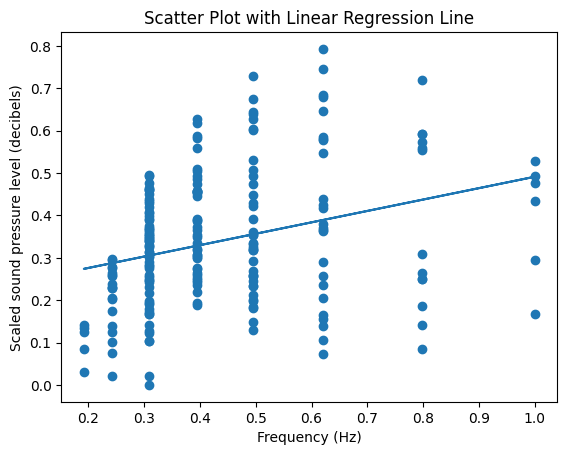

In [17]:
# We can view this line overlaying the scatter plot

plt.scatter(X_2,Y_2)
plt.plot(X_2,reg_two.predict(X_2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Scatter Plot with Linear Regression Line');

# My ideas applied to Jose's work
### I am clustering a little differently (leaving out the "output")

In [18]:
af_data_inputs = df_mydata_norm.drop(columns=['Scaled sound pressure level (decibels)'])

In [19]:
from sklearn.cluster import KMeans


# Specify the value of K, initialization method, and number of times KMeans is run.
KM = KMeans(3, init = 'random', n_init = 10)

# Fit the model to your data set (in other words, apply km to your data.
KM.fit(af_data_inputs)

# This extracts the coordinates corresponding to the clusters' centers.
centers = KM.cluster_centers_
# This extracts the cluster labels.
label = KM.labels_

In [20]:
X = KM.fit_predict(af_data_inputs)
X

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [21]:
af_data = df_mydata_norm.copy()

In [22]:
af_data["Cluster"]= X
af_data.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels),Cluster
0,0.030303,0.0,1.0,1.0,0.039005,0.606829,1
1,0.040404,0.0,1.0,1.0,0.039005,0.580238,1
2,0.053030,0.0,1.0,1.0,0.039005,0.600181,1
3,0.070707,0.0,1.0,1.0,0.039005,0.643790,1
4,0.090909,0.0,1.0,1.0,0.039005,0.640333,1


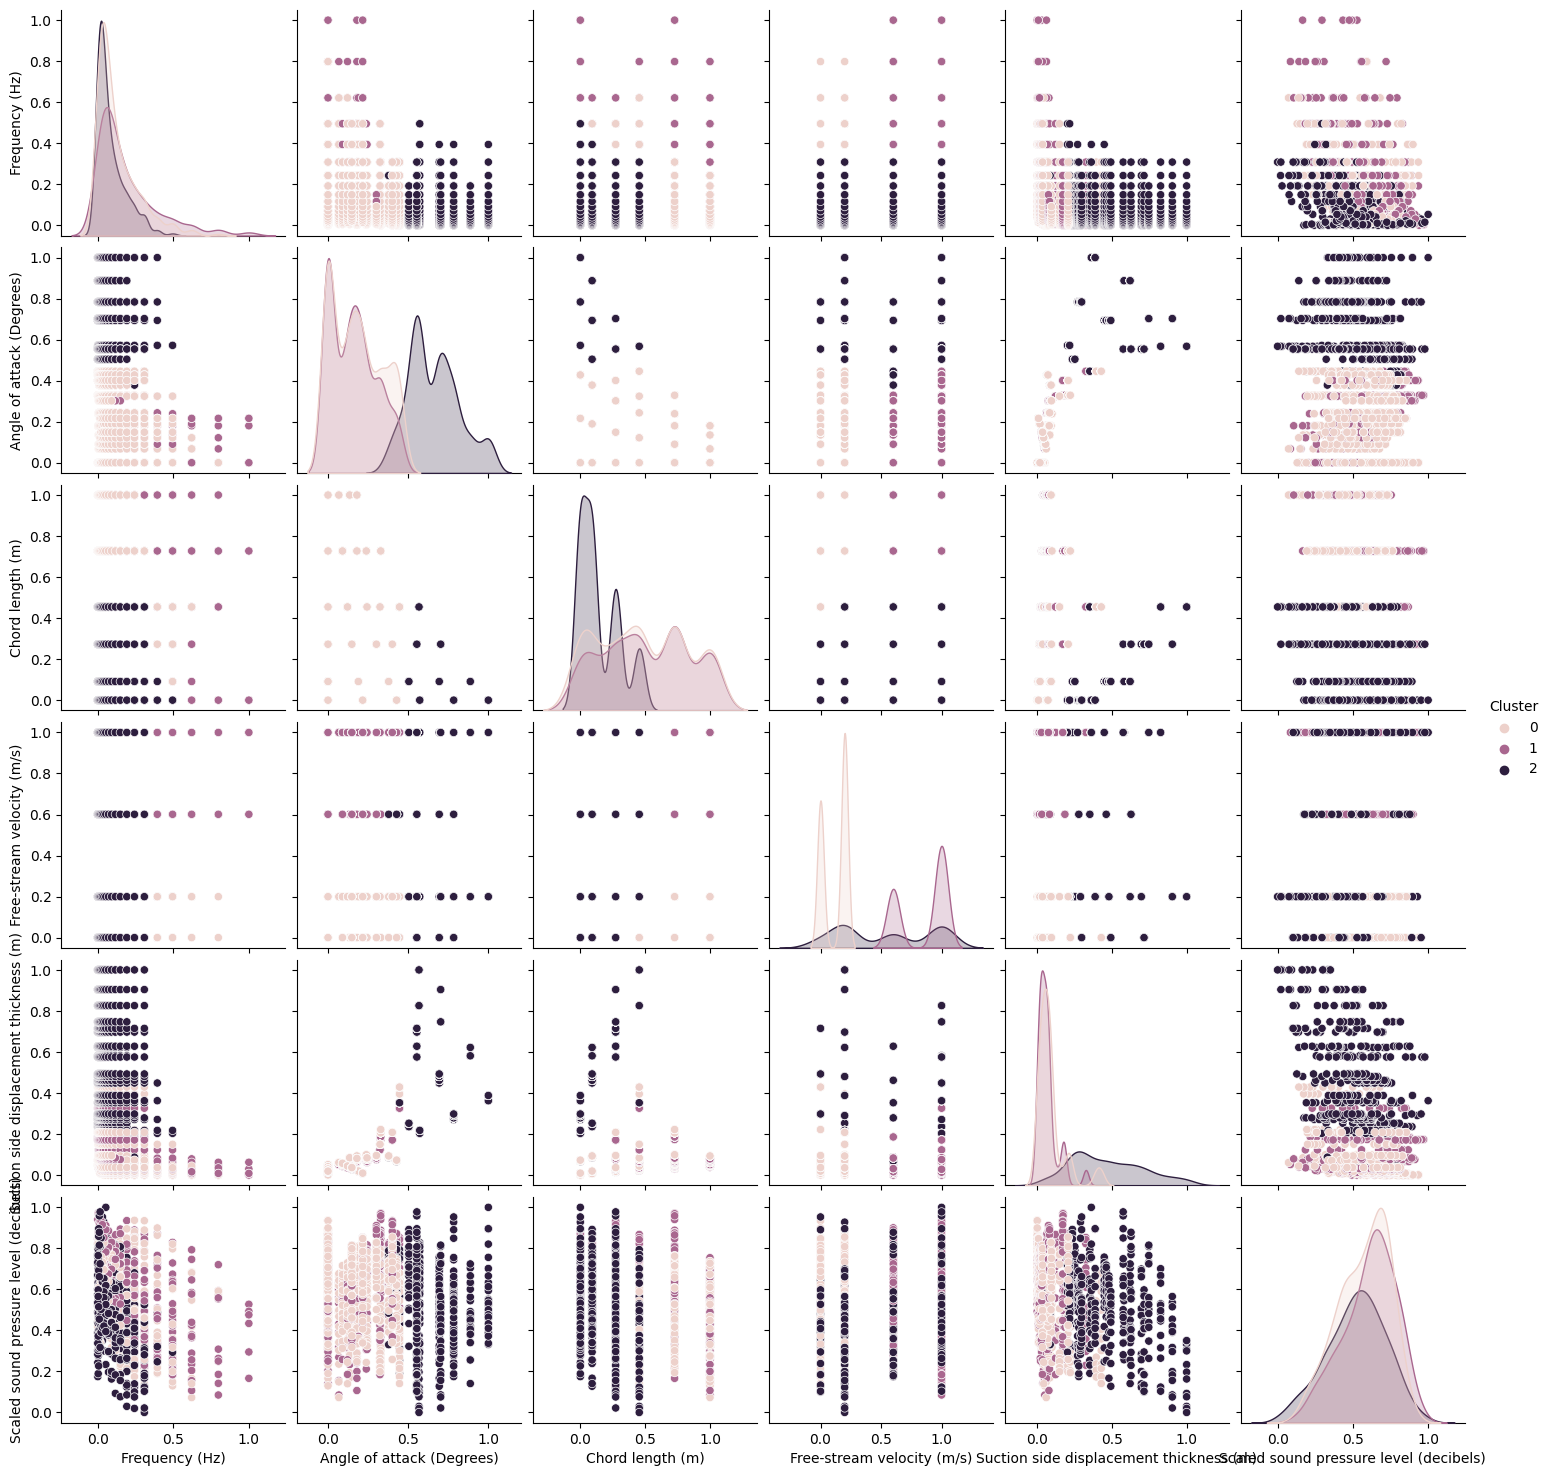

In [23]:
sns.pairplot(af_data, hue='Cluster')

In [24]:
af1_copy = af_data.copy()
af1_copy1 = af1_copy[af1_copy.Cluster == 0]

af1_copy2 = af1_copy[af1_copy.Cluster == 1]

af1_copy3 = af1_copy[af1_copy.Cluster == 2]

In [25]:
af1_copy1.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels),Cluster
29,0.000000,0.0,1.0,0.199495,0.046555,0.392188,0
30,0.002525,0.0,1.0,0.199495,0.046555,0.423831,0
31,0.005808,0.0,1.0,0.199495,0.046555,0.515835,0
32,0.010101,0.0,1.0,0.199495,0.046555,0.569814,0
33,0.015152,0.0,1.0,0.199495,0.046555,0.626984,0


In [26]:
af1_copy2.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels),Cluster
0,0.030303,0.0,1.0,1.0,0.039005,0.606829,1
1,0.040404,0.0,1.0,1.0,0.039005,0.580238,1
2,0.053030,0.0,1.0,1.0,0.039005,0.600181,1
3,0.070707,0.0,1.0,1.0,0.039005,0.643790,1
4,0.090909,0.0,1.0,1.0,0.039005,0.640333,1


In [27]:
af1_copy3.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels),Cluster
645,0.000000,0.445946,0.454545,0.60101,0.352403,0.759832,2
646,0.002525,0.445946,0.454545,0.60101,0.352403,0.793868,2
647,0.005808,0.445946,0.454545,0.60101,0.352403,0.770468,2
648,0.010101,0.445946,0.454545,0.60101,0.352403,0.750525,2
649,0.015152,0.445946,0.454545,0.60101,0.352403,0.649746,2


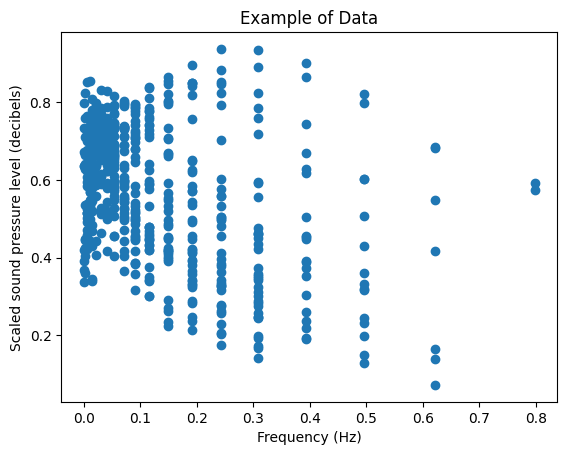

In [28]:
plt.scatter(af1_copy1['Frequency (Hz)'],af1_copy1['Scaled sound pressure level (decibels)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Example of Data');

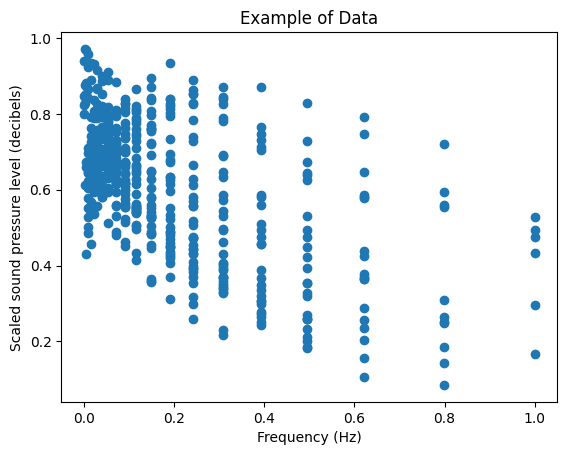

In [29]:
plt.scatter(af1_copy2['Frequency (Hz)'],af1_copy2['Scaled sound pressure level (decibels)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Example of Data');

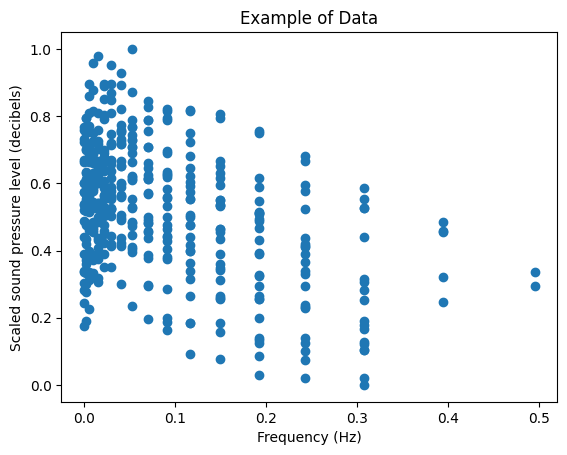

In [30]:
plt.scatter(af1_copy3['Frequency (Hz)'],af1_copy3['Scaled sound pressure level (decibels)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Example of Data');

### I'm going to do regression on the first plot

In [31]:
X_input1 = af1_copy1['Frequency (Hz)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y_input1 = af1_copy1['Scaled sound pressure level (decibels)'].values.reshape(-1,1)

reg_input1 = LinearRegression()
reg_input1.fit(X_input1, Y_input1)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg_input1.intercept_[0], reg_input1.coef_[0][0]))

The linear model is: Y = 0.6339 + -0.50142X


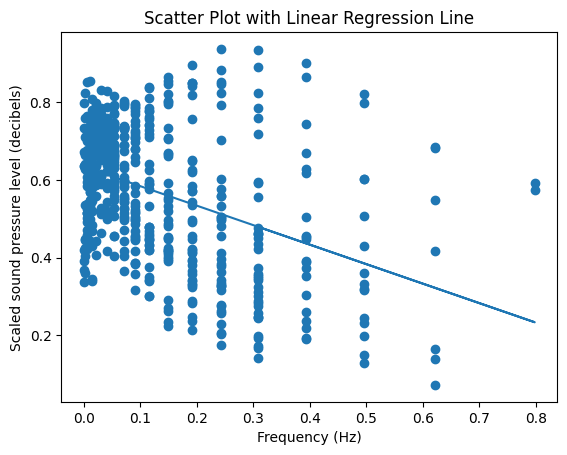

In [32]:
plt.scatter(X_input1,Y_input1)
plt.plot(X_input1,reg_input1.predict(X_input1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Scatter Plot with Linear Regression Line');

# I liked the results I was getting.
### Now I am trying it by just clustering the output (which may be the way to go logically anyway, so let's hope the data looks good)

In [33]:
af_data_output = df_mydata_norm.drop(columns=['Frequency (Hz)','Angle of attack (Degrees)','Chord length (m)','Free-stream velocity (m/s)','Suction side displacement thickness (m)'])

In [34]:
af_data_output.head()

,Scaled sound pressure level (decibels)
0,0.606829
1,0.580238
2,0.600181
3,0.643790
4,0.640333


In [35]:
Km = KMeans(3, init = 'random', n_init = 10)

# Fit the model to your data set (in other words, apply km to your data.
Km.fit(af_data_output)

# This extracts the coordinates corresponding to the clusters' centers.
centers = Km.cluster_centers_
# This extracts the cluster labels.
label = Km.labels_

In [36]:
Y = Km.fit_predict(af_data_output)
Y

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [37]:
af2_data = df_mydata_norm.copy()

In [38]:
af2_data["Cluster"]= Y
af2_data.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels),Cluster
0,0.030303,0.0,1.0,1.0,0.039005,0.606829,0
1,0.040404,0.0,1.0,1.0,0.039005,0.580238,0
2,0.053030,0.0,1.0,1.0,0.039005,0.600181,0
3,0.070707,0.0,1.0,1.0,0.039005,0.643790,0
4,0.090909,0.0,1.0,1.0,0.039005,0.640333,0


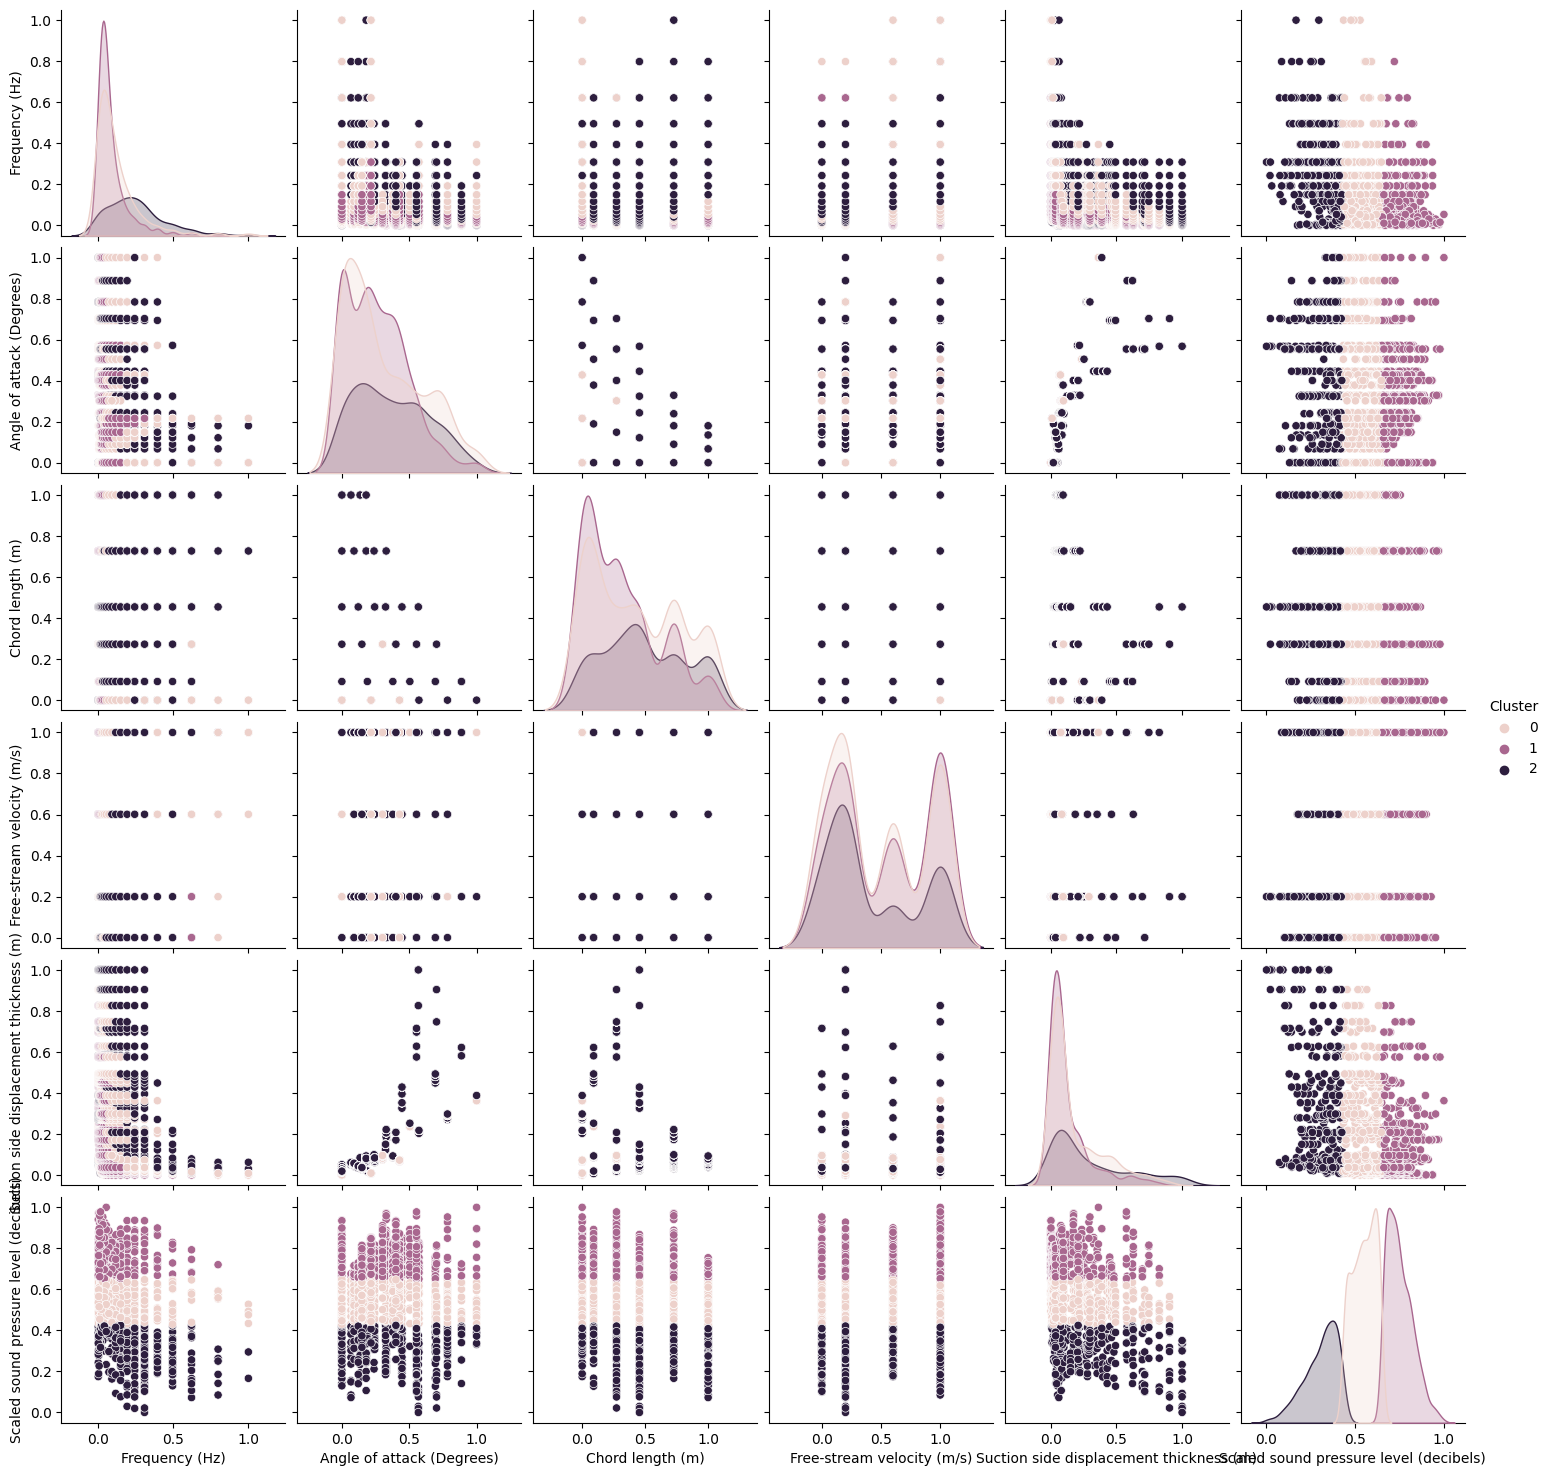

In [39]:
sns.pairplot(af2_data, hue='Cluster');

In [40]:
af2_copy = af2_data.copy()
af2_copy1 = af1_copy[af2_copy.Cluster == 0]

af2_copy2 = af1_copy[af2_copy.Cluster == 1]

af2_copy3 = af1_copy[af2_copy.Cluster == 2]

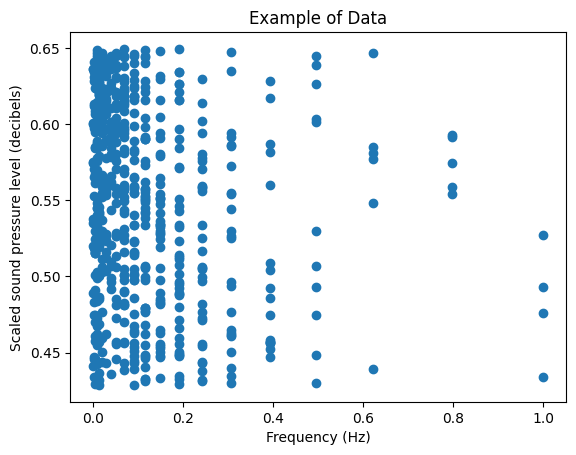

In [41]:
plt.scatter(af2_copy1['Frequency (Hz)'],af2_copy1['Scaled sound pressure level (decibels)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Example of Data');

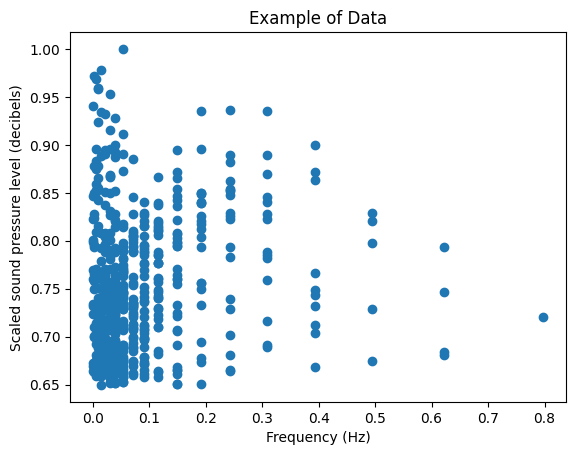

In [42]:
plt.scatter(af2_copy2['Frequency (Hz)'],af2_copy2['Scaled sound pressure level (decibels)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Example of Data');

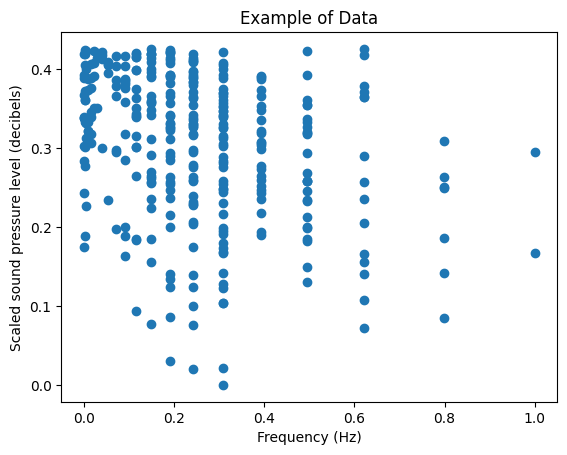

In [43]:
plt.scatter(af2_copy3['Frequency (Hz)'],af2_copy3['Scaled sound pressure level (decibels)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Example of Data');

### I'm going to do regression on the second plot

In [44]:
X_output2 = af2_copy2['Frequency (Hz)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y_output2 = af2_copy2['Scaled sound pressure level (decibels)'].values.reshape(-1,1)

reg_output2 = LinearRegression()
reg_output2.fit(X_output2, Y_output2)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg_output2.intercept_[0], reg_output2.coef_[0][0]))

The linear model is: Y = 0.74299 + 0.093923X


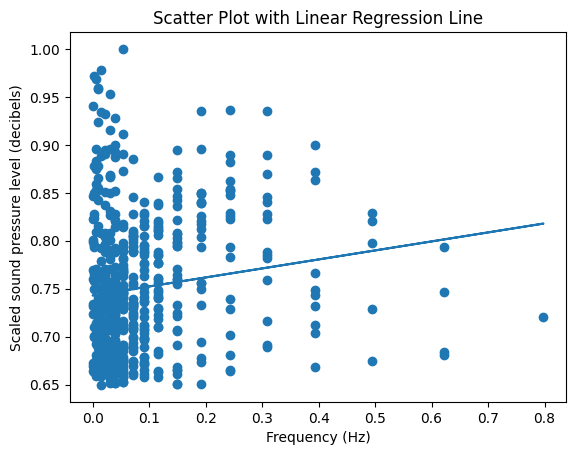

In [45]:
plt.scatter(X_output2,Y_output2)
plt.plot(X_output2,reg_output2.predict(X_output2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Scatter Plot with Linear Regression Line');

## Trying KMeans with just 2 clusters in the output

In [46]:
km2 = KMeans(2, init = 'random', n_init = 10)

# Fit the model to your data set (in other words, apply km to your data.
km2.fit(af_data_output)

# This extracts the coordinates corresponding to the clusters' centers.
centers = km2.cluster_centers_
# This extracts the cluster labels.
label = km2.labels_

In [47]:
Y2 = km2.fit_predict(af_data_output)
Y2

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [48]:
af2cluster = df_mydata_norm.copy()

In [52]:
af2cluster["Cluster"]= Y2
af2cluster.head()

,Frequency (Hz),Angle of attack (Degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (decibels),Cluster
0,0.030303,0.0,1.0,1.0,0.039005,0.606829,0
1,0.040404,0.0,1.0,1.0,0.039005,0.580238,0
2,0.053030,0.0,1.0,1.0,0.039005,0.600181,0
3,0.070707,0.0,1.0,1.0,0.039005,0.643790,0
4,0.090909,0.0,1.0,1.0,0.039005,0.640333,0


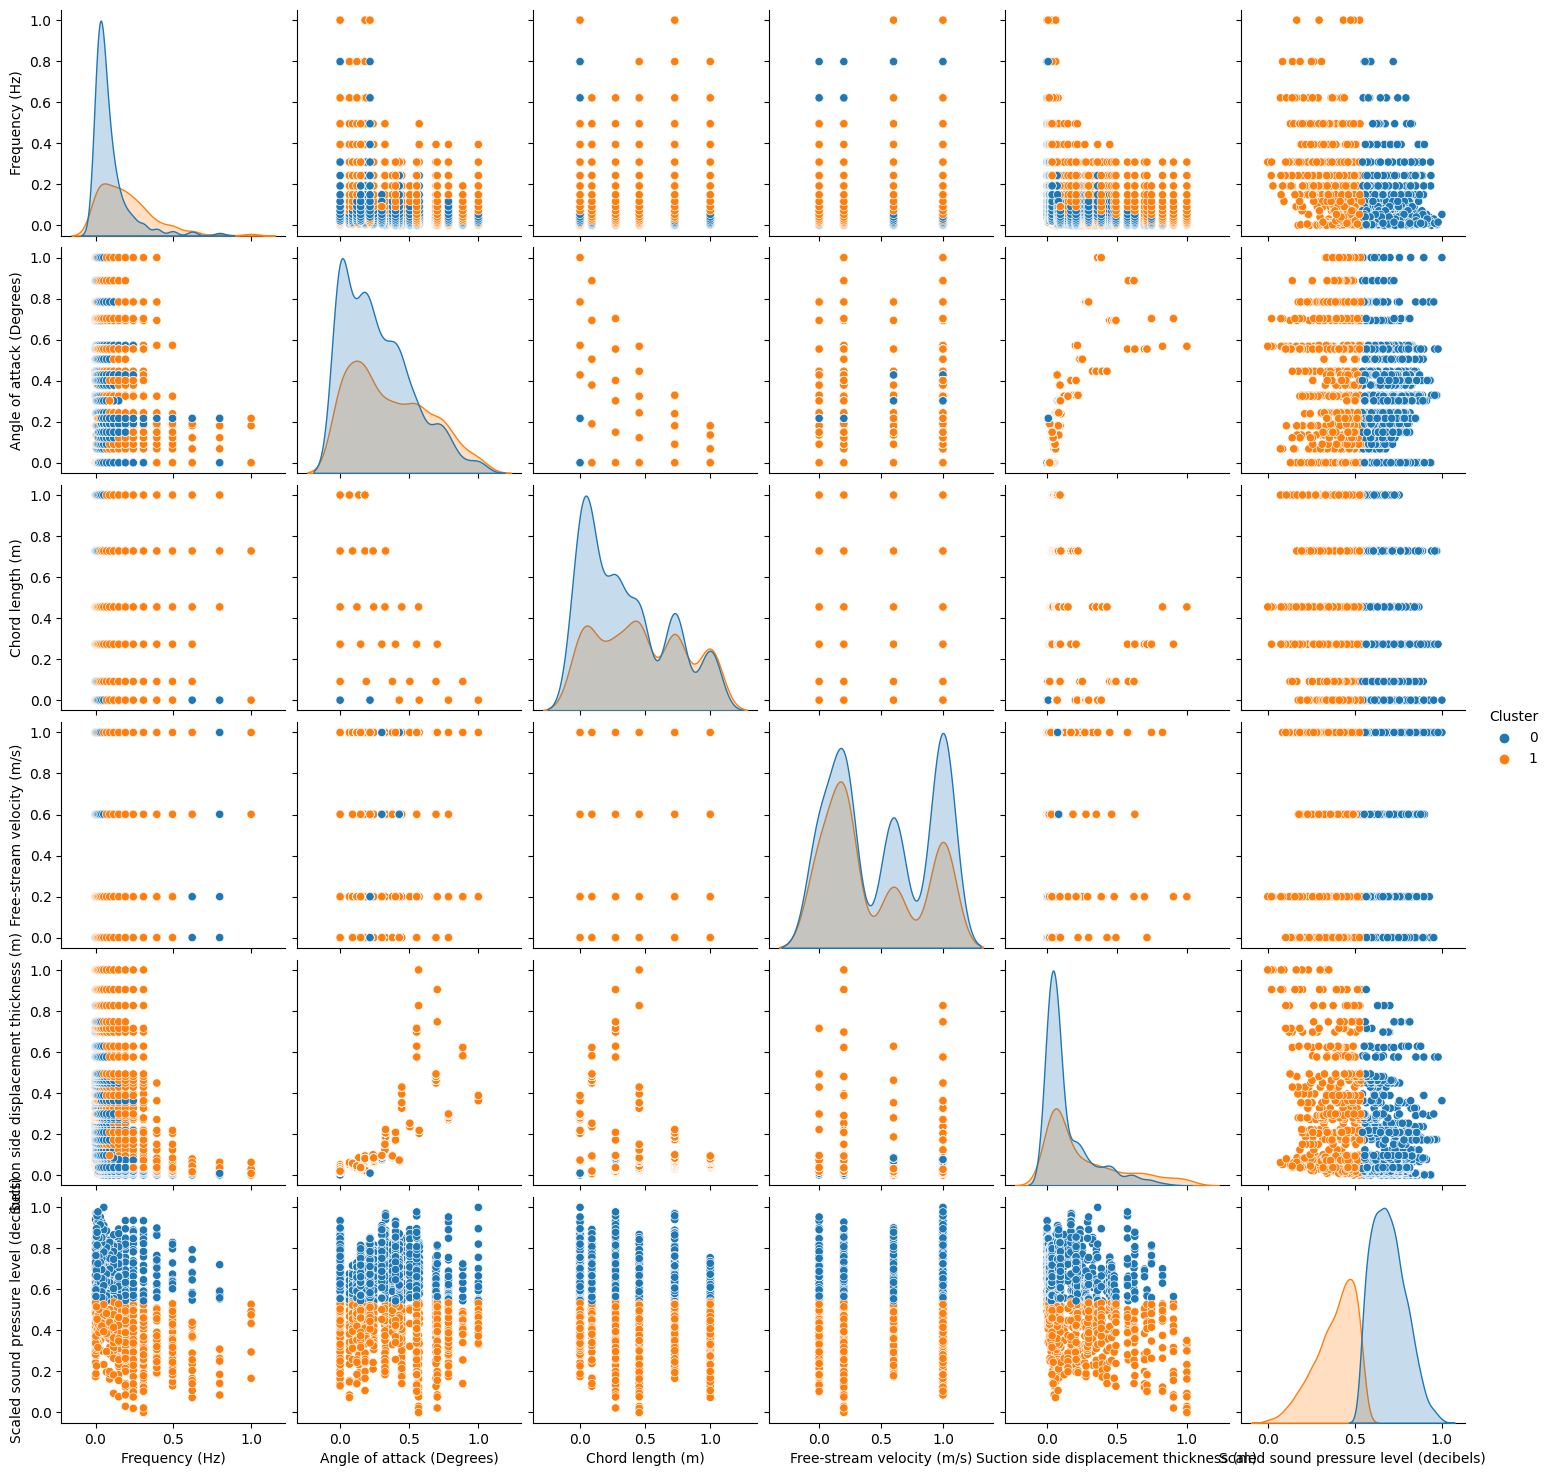

In [53]:
sns.pairplot(af2cluster, hue='Cluster');

In [54]:
twocluster_copy = af2cluster.copy()
twocluster_copy1 = twocluster_copy[af2cluster.Cluster == 0]

twocluster_copy2 = twocluster_copy[af2cluster.Cluster == 1]

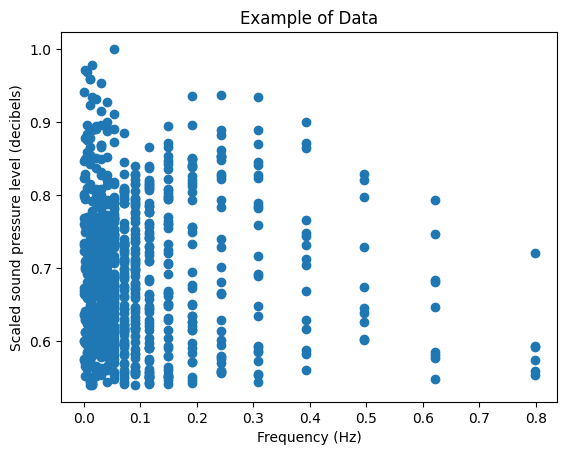

In [55]:
plt.scatter(twocluster_copy1['Frequency (Hz)'],twocluster_copy1['Scaled sound pressure level (decibels)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Example of Data');

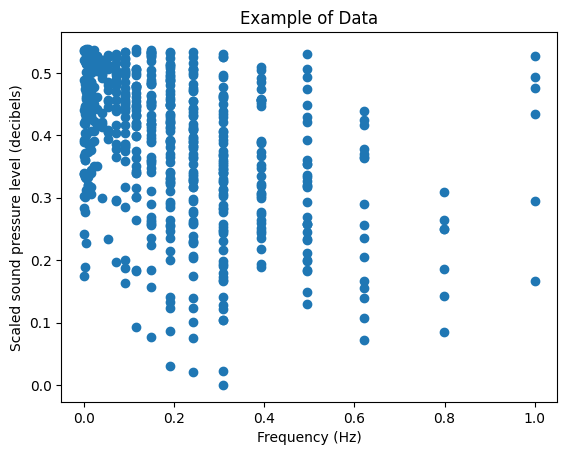

In [56]:
plt.scatter(twocluster_copy2['Frequency (Hz)'],twocluster_copy2['Scaled sound pressure level (decibels)'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Example of Data');

In [59]:
X_output3 = twocluster_copy1['Frequency (Hz)'].values.reshape(-1,1)     # NOTE: the reshape is needed to force the correct dimensions
Y_output3 = twocluster_copy1['Scaled sound pressure level (decibels)'].values.reshape(-1,1)

reg_output3 = LinearRegression()
reg_output3.fit(X_output2, Y_output2)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg_output3.intercept_[0], reg_output3.coef_[0][0]))

The linear model is: Y = 0.74299 + 0.093923X


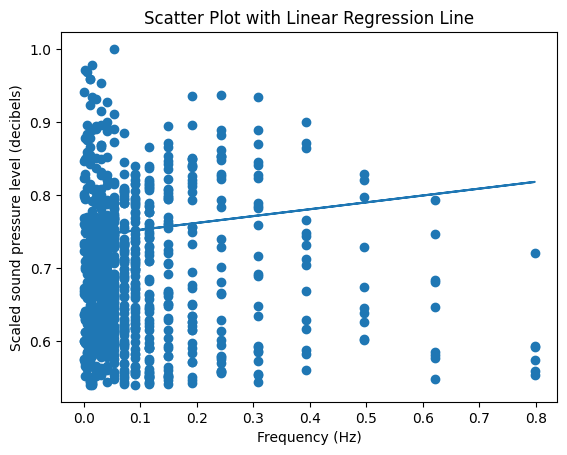

In [60]:
plt.scatter(X_output3,Y_output3)
plt.plot(X_output3,reg_output3.predict(X_output3))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled sound pressure level (decibels)')
plt.title('Scatter Plot with Linear Regression Line');